In [1]:
# Importer les librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Descriptif du jeu de donnée :

Une entreprise de vente de voiture vient de sortir une nouvelle voiture de luxe mais absolument pas chère.
L'entreprise a donc mis en ligne une publicité de cet voiture sur les réseaux sociaux.
- Dans notre jeux de données la variable cible est "Purchased". elle prendra la valeur :
>- 0 si la personne n'a pas cliqué sur la pub
>- 1 s'il a cliqué sur la pub et acheté la voiture.
- Les variables explicatives sont le genre, l'âge et l'estimation du salaire.

In [3]:
# Importer le jeu de données
data = pd.read_csv('donnees/Social_Network_Ads.csv')

In [4]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [6]:
# Je crée mes Pipline et transforme mes variables

num_attribs1 = ["Age", "EstimatedSalary"]
num_attribs2 = ["EstimatedSalary"]
cat_attribs = ["Gender"]


num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])


full_pipeline1 = ColumnTransformer([
        ("num", num_pipeline, num_attribs1),
    ])

full_pipeline2 = ColumnTransformer([
        ("num", num_pipeline, num_attribs2),
    ])

full_pipeline3 = ColumnTransformer([
        ("num", num_pipeline, num_attribs1),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [7]:
def learning(full_pipeline):
    ac_score = []

    skf = StratifiedKFold(n_splits=100) # stratified leave-k-out cross validation

    for train_index, test_index in skf.split(data, data['Purchased']):

        data_train, data_test = data.loc[train_index], data.loc[test_index]

        X_train = full_pipeline.fit_transform(data_train) # Attention ici on utilise la méthode fit_transforme
        y_train = np.array(data_train["Purchased"])

        X_test = full_pipeline.transform(data_test)  # et ici on utilise la méthode transforme
        y_test = np.array(data_test["Purchased"])

        model = SGDClassifier(max_iter=1000, loss='hinge')
        model.fit(X_train, y_train)
        ac_score.append(accuracy_score(y_test, model.predict(X_test)))

        #print(accuracy_score(y_test, model.predict(X_test)))

    print("****************")
    print("Précision moyenne : ", np.mean(ac_score))
    return np.mean(ac_score)

In [8]:
learning(full_pipeline1)
learning(full_pipeline2)
learning(full_pipeline3)

****************
Précision moyenne :  0.8175
****************
Précision moyenne :  0.66
****************
Précision moyenne :  0.83


#### Je décide de concerver le 3ième modèle et de l'entrainer avec toute les données.

In [9]:
X = full_pipeline3.fit_transform(data)
y = np.array(data["Purchased"])

model = SGDClassifier(max_iter=1000, loss='hinge')
model.fit(X, y)

SGDClassifier()

#### Visualisation des résultat avec le tracé de la marge pour deux variables explicatives (modèle 1)

In [10]:
X = full_pipeline1.fit_transform(data)
y = np.array(data["Purchased"])

model = SGDClassifier(max_iter=1000, loss='hinge')
model.fit(X, y)

SGDClassifier()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


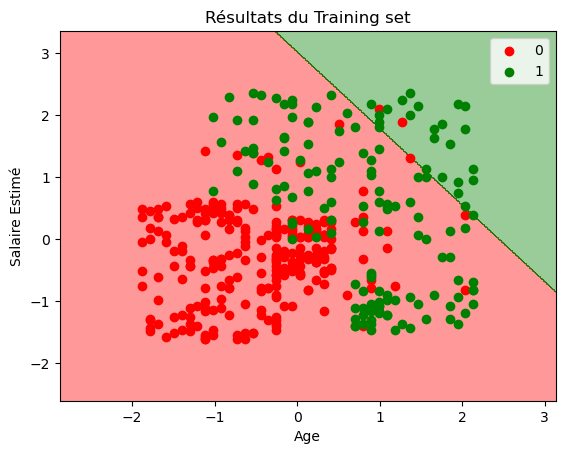

In [11]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_separating_hyperplane.html#sphx-glr-auto-examples-linear-model-plot-sgd-separating-hyperplane-py

# Je génère deux listes ayant le même bornes que les variables age et salaire standardisées.
# chacune des valeurs est espacé de 0.01 (c'est le pas)
# Se sont ces deux listes que je vais utiliser pour tracer la marge.
from matplotlib.colors import ListedColormap

X = full_pipeline1.transform(data)
x1 = np.arange(start = X[:, 0].min() - 1, stop = X[:, 0].max() + 1, step = 0.01)
x2 = np.arange(start = X[:, 1].min() - 1, stop = X[:, 1].max() + 1, step = 0.01)

# La fonction meshgrid de numpy permet d'obtenir deux tableaux de deux dimensions
# avec autant de ligne et de colonnes que x1 et x2.
# Pour le premier tableux les valeurs du vecteur x1 se répètent sur chacune des lignes.
# Pour le second tableux les valeurs du vecteur x2 se répètent sur chacune des lignes.
X1, X2 = np.meshgrid(x1,x2)

# Pour chacune de ces valeurs je vais faire une prédiction.
# J'utilise la méthode .ravel() de numpy pour passer mes tableaux en lignes
# J'utilise la méthode .T pour passer mes deux lignes en deux colonnes
# Aprés avoir obtenu les prédictions, j'utilise la méthode .reshape() pour passer la liste des prédictions
# au même format que les tableaux obtenu avec mesgrid().

Z = model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

plt.contourf(x1, x2, Z,
             alpha = 0.4, cmap = ListedColormap(('red', 'green')));

for i, j in enumerate(np.unique(y)):
    plt.scatter(X[y == j, 0], X[y == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Résultats du Training set')
plt.xlabel('Age')
plt.ylabel('Salaire Estimé')
plt.legend()
plt.show()

In [12]:
# Construction du modèle
from sklearn.kernel_approximation import PolynomialCountSketch, RBFSampler


num_attribs = ["Age", "EstimatedSalary"]
cat_attribs = ["Gender"]

num_pipeline1 = Pipeline([
        ('std_scaler', StandardScaler()),
        ('poly', PolynomialCountSketch(degree=5))
    ])

num_pipeline2 = Pipeline([
        ('std_scaler', StandardScaler()),
        ('RBFGaussian', RBFSampler(gamma=0.5))
    ])


full_pipeline1 = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

full_pipeline2 = ColumnTransformer([
        ("num", num_pipeline2, num_attribs),
    ])

In [13]:
learning(full_pipeline1)
learning(full_pipeline2)

****************
Précision moyenne :  0.8275
****************
Précision moyenne :  0.9025


0.9025

In [14]:
X = full_pipeline2.fit_transform(data)
y = np.array(data["Purchased"])

model = SGDClassifier(max_iter=1000, loss='hinge')
model.fit(X, y)

SGDClassifier()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


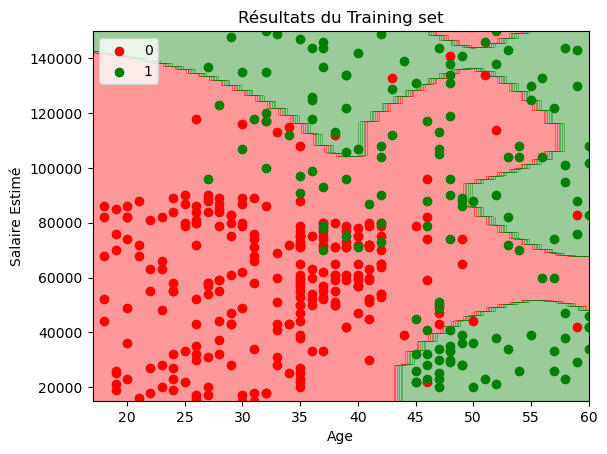

In [15]:
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, -1].values
x1 = np.arange(start = X[:, 0].min() - 1, stop = X[:, 0].max() + 1, step = 1)
x2 = np.arange(start = X[:, 1].min() - 1, stop = X[:, 1].max() + 1, step = 100)

x1, x2 = np.meshgrid(x1,x2)

Age = x1.ravel()
EstimatedSalary = x2.ravel()

Users = np.zeros(len(Age))
Gender = np.zeros(len(Age))
Purchased = np.zeros(len(Age))


data2 = pd.DataFrame(np.array([Users, Gender, Age, EstimatedSalary, Purchased]).T, columns=data.columns)

X_predict = full_pipeline2.transform(data2)


Z = model.predict(full_pipeline2.transform(data2)).reshape(x1.shape)

plt.contourf(x1, x2, Z,
             alpha = 0.4, cmap = ListedColormap(('red', 'green')));

for i, j in enumerate(np.unique(y)):
    plt.scatter(X[y == j, 0], X[y == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Résultats du Training set')
plt.xlabel('Age')
plt.ylabel('Salaire Estimé')
plt.legend()
plt.show()